Task 1

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

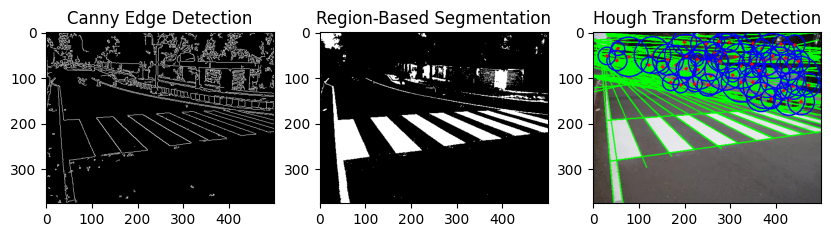

In [20]:
# Load image
image = cv2.imread("/content/road.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge-based segmentation (Canny Edge Detection)
edges = cv2.Canny(gray, 50, 150)

# Region-based segmentation using Thresholding
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Hough Transform - Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform - Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=50)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)  # Draw the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw the center

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1,  3, 1), plt.imshow(edges, cmap='gray'), plt.title("Canny Edge Detection")
plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray'), plt.title("Region-Based Segmentation")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Hough Transform Detection")
plt.show()

Task 2

In [21]:
!pip install opencv-python
!pip install ultralytics


0: 448x640 1 dog, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


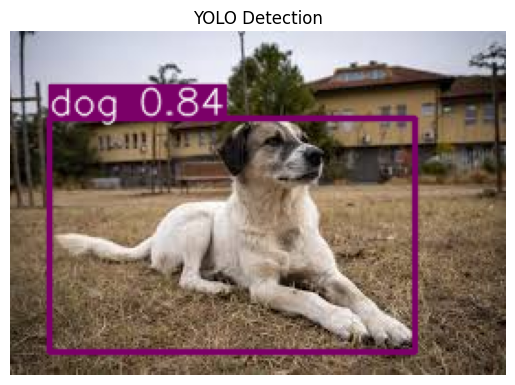

In [22]:
import cv2
from ultralytics import YOLO

# Load YOLO model (ensure you've installed ultralytics as mentioned)
yolo = YOLO("yolov8n.pt")

# Load an image (update with your image path)
image = cv2.imread("/content/dogg_image.jpg")

# Run object detection
results = yolo(image)

# Iterate over each result and display using matplotlib
for result in results:
    annotated_frame = result.plot()  # This draws the detections on the image
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.title("YOLO Detection")
    plt.axis("off")
    plt.show()

Task 2.2

In [23]:
pip install opencv-python tensorflow keras

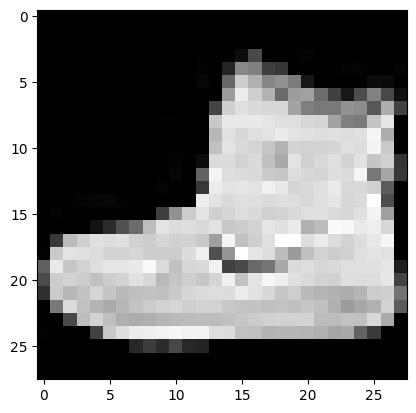

In [24]:
from tensorflow.keras.datasets import fashion_mnist, cifar100
import matplotlib.pyplot as plt

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Load CIFAR-100
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar100.load_data()

# Show some sample images
plt.imshow(X_train[0], cmap="gray")
plt.show()

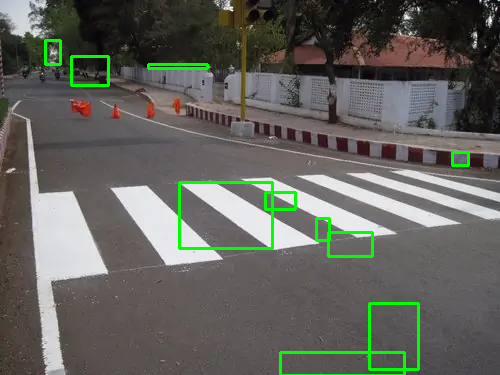

In [25]:
import cv2
from google.colab.patches import cv2_imshow
def selective_search(image):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    return rects

image = cv2.imread("/content/road.jpg")
rects = selective_search(image)

for (x, y, w, h) in rects[:10]:  # Show first 10 proposals
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize and add channel dimension
X_train_norm = X_train[..., None] / 255.0
X_test_norm = X_test[..., None] / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train_norm, y_train, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7719 - loss: 0.6209
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8862 - loss: 0.3132
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9050 - loss: 0.2568
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9173 - loss: 0.2226
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.1993


In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions for the test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.9127
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.85      0.87      1000
           3       0.90      0.94      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:
[[875   0  14  22   1   2  81   0   5   0]
 [  3 980   0  13   2   0   0   0   2   0]
 [ 22   0 854  10  58   0  56   0   0   0]
 [ 11   3   4

In [29]:
from tensorflow.keras.utils import to_categorical

# Normalize the images to the [0, 1] range
X_train_cifar = X_train_cifar.astype("float32") / 255.0
X_test_cifar = X_test_cifar.astype("float32") / 255.0

# Convert labels to one-hot encoding (for training)
y_train_cifar_cat = to_categorical(y_train_cifar, 100)
y_test_cifar_cat = to_categorical(y_test_cifar, 100)

print("X_train shape:", X_train_cifar.shape)
print("y_train shape:", y_train_cifar_cat.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train_cifar, y_train_cifar_cat, epochs=25, batch_size=64, validation_data=(X_test_cifar, y_test_cifar_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,391,236 (5.31 MB)

 Trainable params: 1,389,316 (5.30 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.0885 - loss: 4.4670 - val_accuracy: 0.2354 - val_loss: 3.1866
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2484 - loss: 3.0592 - val_accuracy: 0.3051 - val_loss: 2.8418
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3489 - loss: 2.5410 - val_accuracy: 0.3838 - val_loss: 2.4105
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3973 - loss: 2.2790 - val_accuracy: 0.4436 - val_loss: 2.1110
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4360 - loss: 2.0934 - val_accuracy: 0.4856 - val_loss: 1.9088
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4707 - loss: 1.9540 - val_accuracy: 0.4723 - val_loss: 1.9948
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4987 - loss: 1.8329 - val_accuracy: 0.5233 - val_loss: 1.7556
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5281 - loss: 1.7072 - val_accura

In [35]:
# Predict class probabilities on the test set
y_pred_prob = model.predict(X_test_cifar)

# Convert predictions to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_cifar.flatten()  # Flatten in case y_test_cifar is in shape (n,1)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy (sklearn): {accuracy:.4f}")

# Classification Report: precision, recall, F1-score per class
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix: to see misclassifications
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy (sklearn): 0.5952
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.66      0.73      0.69       100
           2       0.52      0.46      0.49       100
           3       0.37      0.30      0.33       100
           4       0.39      0.38      0.38       100
           5       0.71      0.55      0.62       100
           6       0.65      0.70      0.67       100
           7       0.70      0.54      0.61       100
           8       0.80      0.75      0.77       100
           9       0.85      0.77      0.81       100
          10       0.54      0.52      0.53       100
          11       0.43      0.31      0.36       100
          12       0.75      0.56      0.64       100
          13       0.59      0.44      0.50       100
          14       0.55      0.57      0.56       100
          15       0.56      0.60      0.58 